Final Assignment _ 6140 
Mai Anh Nguyen

In [59]:
# import all neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats

In [60]:
### Data extraction
#(Is the dataset publicly available and downloadable/accessible)
# Is there code to download the dataset 

In [61]:
# Read the data 
# the data can be download from website: https://archive.ics.uci.edu/ml/machine-learning-databases/00477/
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [62]:
#Is the dataset properly described
#Descriptive statistics which summarize the shape of the dataset's distribution
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [63]:
# summay of a DataFrame
#getting the types of all variables and there is no null variable in this data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [64]:
# checking the number of na value 
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [65]:
#Data cleanup (5 pts)
#Is there some cleanup of the dataset (5 pts)
#May include one or all of the following:
#renaming columns
#cleaning up/filling in missing values
#selecting subset of relevant columns

In [66]:
# the data about the transaction data is not accurate so I drop the "transaction date" column
df = df.drop(['X1 transaction date'], axis =1)

In [67]:
#renaming columns
df = df.rename(columns={"X2 house age":"Age",
                  "X3 distance to the nearest MRT station":"MRTdistance",
                  "X4 number of convenience stores":"No_CS",
                  "X5 latitude": "Latitude",
                  "X6 longitude": "Longitude",
                  "Y house price of unit area": "Price"})
df.head()

,No,Age,MRTdistance,No_CS,Latitude,Longitude,Price
0,1,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,5.0,390.56840,5,24.97937,121.54245,43.1


In [68]:
#Data visualization (10 pts)
#Visualize important dimensions of the data
#Outline a few trends you can see

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Price, dtype: float64

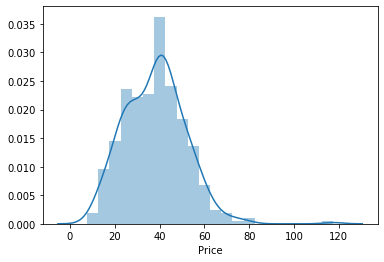

In [69]:
#the distribution of the house price
sns.distplot(df['Price'])
df['Price'].mean()
df['Price'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: Age, dtype: float64

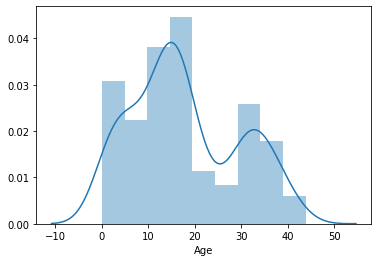

In [70]:
#the distribution of the Age of houses
sns.distplot(df['Age'])
df['Age'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: MRTdistance, dtype: float64

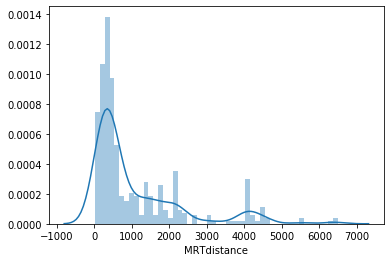

In [71]:
#the distribution of the distance to MRT of houses
sns.distplot(df['MRTdistance'], bins = 50)
df['MRTdistance'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: No_CS, dtype: float64

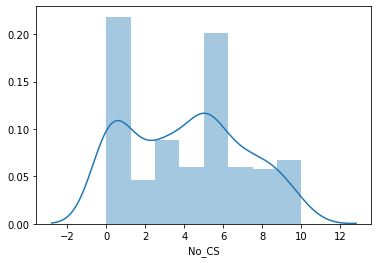

In [72]:
#the distribution of the distance to MRT of houses
sns.distplot(df['No_CS'])
df['No_CS'].describe()

In [73]:
# finding correlation between two different variables 
df.corr()

,No,Age,MRTdistance,No_CS,Latitude,Longitude,Price
No,1.000000,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Age,-0.032808,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
MRTdistance,-0.013573,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
No_CS,-0.012699,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Price,-0.028587,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


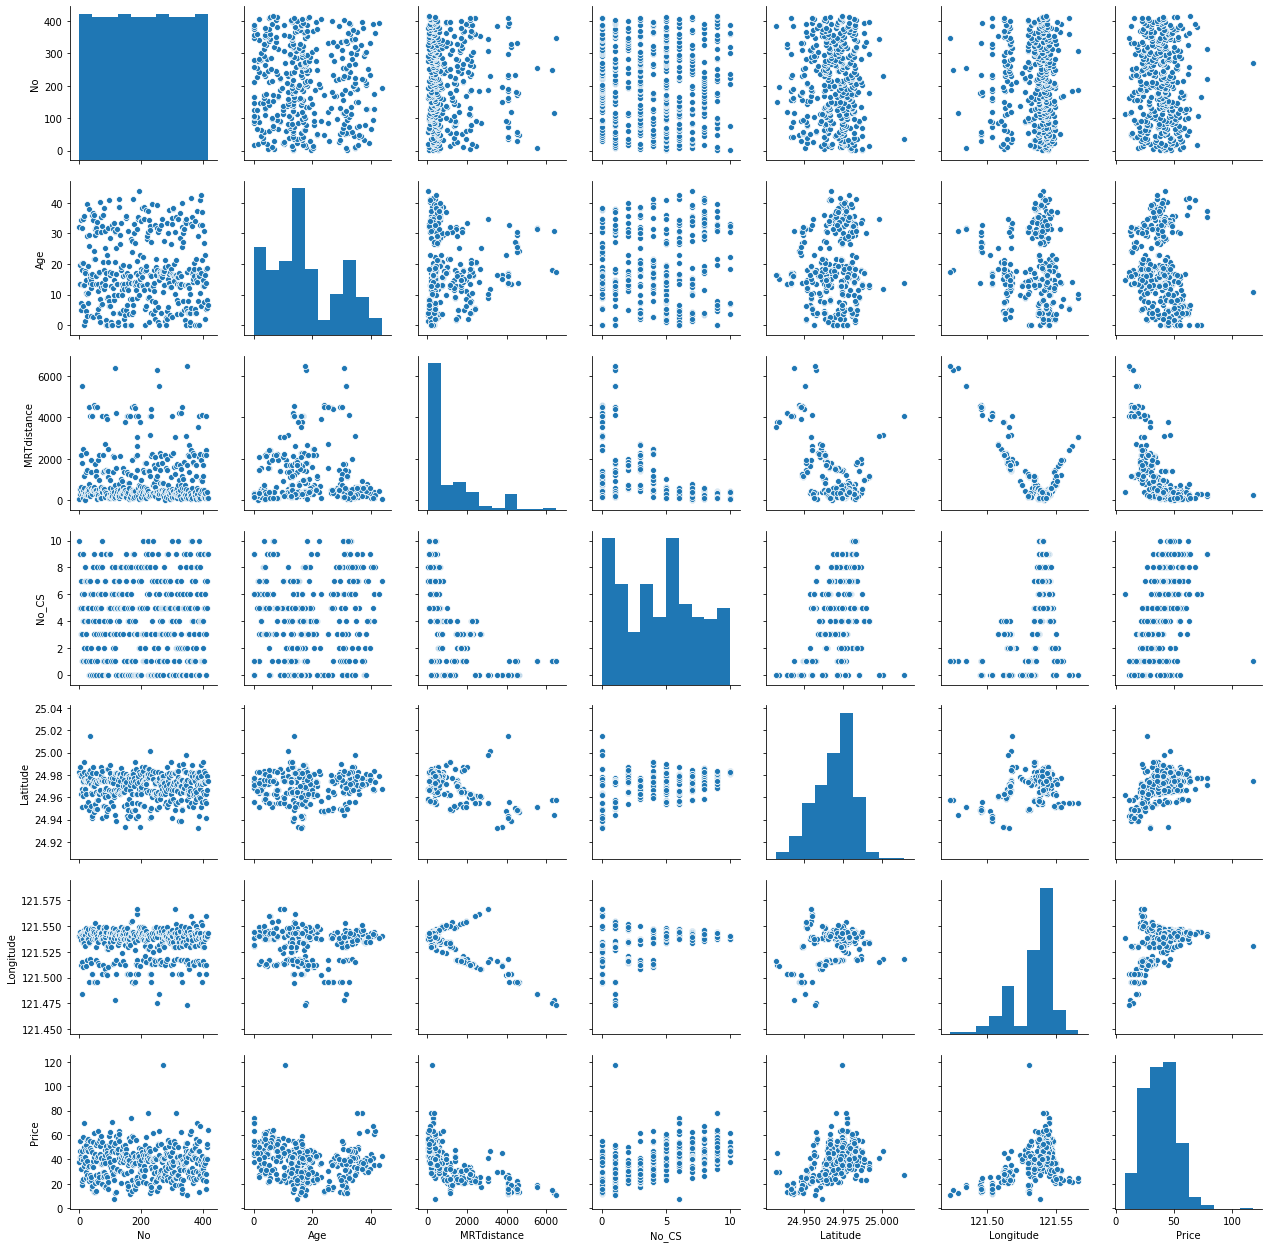

In [74]:
#visualie the correlaation between two different variables 
sns.pairplot(df)

In [75]:
#Descriptive Analytics (10 pts)
#Draw conclusions from the data using descriptive/predictive analysis
#Is your hypothesis supported by data/visualization
#Are there surprising trends in the data

In [76]:
#Extra Credit: Predictive Analytics (10 pts):
#Utilize one or more sklearn methods to do predictive analytics on your data (10 pts)
#Predictive analysis should be aimed at answering your question of interest and providing further support of your conclusions and insights

In [77]:
### TRAIN A LINEAR REGRESSION
# Address column
x = df[['Age', 'MRTdistance', 'No_CS', 'Latitude', 'Longitude']]
y = df['Price']

In [78]:
# split training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
train_test_split?

In [79]:
#creating and training model
lm = LinearRegression()
#train the model: fits the linear regression model on the training data
model = lm.fit(x_train, y_train)

In [80]:
#prediction from models: predictions off the test set and see how well it did
predictions = model.predict(x_test)
predictions

array([33.95307251, 40.18714844, 11.73460307, 36.66349639, 51.67550712,
       39.77197795, 33.71349599, 41.34804405, 41.5575943 , 10.11889072,
       46.85675658, 41.60609875, 12.26431379, 33.01865054, 34.59849986,
       27.64227335, 47.32118025, 42.58142283, 29.42529885, 41.71749159,
       47.33493615, 49.37395502, 37.12664187, 45.25424116, 30.80014442,
       38.99783951, 30.04950884, 46.03401512, 48.83109865, 47.3184724 ,
       53.54773863, 29.47361524, 30.2793635 , 46.05636746, 44.85731342,
       38.81065929, 44.84874458, 43.34346271, 46.05636746, 38.08565642,
       15.11011422, 46.05636746, 49.51517816, 42.47170505, 42.38432851,
       48.91399842, 45.09269493, 46.68631517, 45.42468257,  2.86295856,
       48.83621764, 41.22644785, 40.58092504, 37.98548665, 46.00560822,
       24.21125854, 10.74228771, 34.29688875, 29.67446513, 44.78091351,
       36.48957827, 39.5599832 , 35.97358008, 44.96237219, 40.22963188,
       36.91466257, 40.42917381, 46.76654   , 33.62827529, 12.08

Text(0, 0.5, 'Predictions')

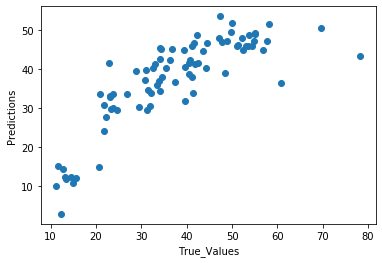

In [81]:
#visualize the prediction
plt.scatter(y_test, predictions)
plt.xlabel('True_Values')
plt.ylabel('Predictions')

In [82]:
#checking the accuracy of the model
#R² Value:- It measures the strength of the relationship between your model and the dependent variable on a convenient 0–100% scale.
# The closer towards 1, the better the fit
r_value = lm.score(x_test, y_test)
r_value

0.6786057470361384

In [83]:
def calculateR_square(model, x, y):
    return model.score(x, y)
r_value = calculateR_square(lm, x_test, y_test)
r_value

0.6786057470361384

In [84]:
#Root Mean Square Error (RMSE) is the standard deviation of the residuals(prediction errors). Residuals are a measure of how far from the regression line data points are.
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

8.09800624352342